# 의사 결정 나무

의사 결정 나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다. 여기에서는 의사 결정 나무로 분류 문제를 푸는 법을 설명한다.

## 의사 결정 나무의 분류 방법

의사 결정 나무의 분류 방법은 다음과 같다.

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 2)으로 나눈다. 
3. 자식 노드에 있는 데이터의 클래스의 비율을 조사하여 가장 데이터 수가 많은 클래스를 그 자식 노드의 대표 클래스로 정한다.
4. 각각의 자식 노드에 대해 1~3의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

## 의사 결정 나무를 사용한 예측

이렇게 만들어진 의사 결정 나무를 이용하여 테스트 데이터의 클래스를 예측하려면 가장 상위의 노드부터 분류 규칙을 적용하여 하위의 자식 노드를 선택한다. 가장 마지막에 선택된 노드의 대표 클래스가 그 데이터의 클래스 예측값이 된다.

##  규칙 결정 방법

규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮추는 독립 변수와 기준값을 찾는 것이다. 이러한 기준을 정량화한 것이 information gain 이다. 찾는 방법은 기본적으로 모든 독립 변수와 모든 기준값에 대해 information gain 을 구해보고 가장 information gain 을 크게 만드는 독립 변수와 기준값을 선택한다.

## Information Gain

IG(information gain)는 데이터 분리에 의해 확률 변수의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다.

$$ IG[Y,X] = H[Y] - H[Y|X] $$ 

예를 들어 다음과 같은 두가지 경우를 생각하자.

<img src="https://datascienceschool.net/upfiles/50d9204d21e840a3915d941667843c78.png" style="width:70%; margin: 0 auto 0 auto;">


In [ ]:
메일이 총 80개 중에 스팸이40개 정상이 40개 


A 방법과 B 방법 모두 노드 분리 전에는 Y=0 인 데이터의 수와 Y=1 인 데이터의 수가 모두 40개였다. 

A 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 A1은 Y=0 인 데이터가 30개, Y=1 인 데이터가 10개 
* 자식 노드 A2은 Y=0 인 데이터가 10개, Y=1 인 데이터가 30개 

B 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 B1은 Y=0 인 데이터가 20개, Y=1 인 데이터가 40개 
* 자식 노드 B2은 Y=0 인 데이터가 20개, Y=1 인 데이터가 0개 

우선 부모 노드의 엔트로피를 계산하면 다음과 같다.


$$ H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$


A 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$

$$ H[Y|X=X_2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81 $$

$$ H[Y|X] = \dfrac{1}{2} H[Y|X=X_1] + \dfrac{1}{2} H[Y|X=X_2] = 0.81 $$

$$ IG = H[Y] - H[Y|X] = 0.19 $$ 

B 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) - \dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$

$$ H[Y|X=X_2] = 0 $$

$$ H[Y|X] = \dfrac{3}{4} H[Y|X=X_1] + \dfrac{1}{4} H[Y|X=X_2] = 0.69 $$

$$ IG = H[D] - H[Y|X] = 0.31 $$ 

따라서 B 방법이 더 나은 방법임을 알 수 있다.

## Scikit-Learn의 의사 결정 나무 클래스

Scikit-Learn에서 의사 결정 나무는 `DecisionTreeClassifier` 클래스로 구현되어있다. 여기에서는 붓꽃 분류 문제를 예롤 들어 의사 결정 나무를 설명한다. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃받침의 길이와 폭만을 독립변수로 사용하였다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)

다음은 의사 결정 나무를 시각화하기 위한 코드이다.

In [1]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

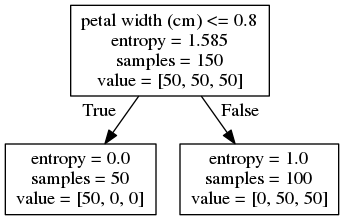

In [4]:
draw_decision_tree(tree1)

In [ ]:
## 조건부 엔트리를 구했을때 꽃바침의 폭을 이용하라는 결론이 나옴, 그의 threshold는 0.8 으로 나뉨 , True인경우 벨류값이 제일 큰 x1을 고르게 됨 
## 

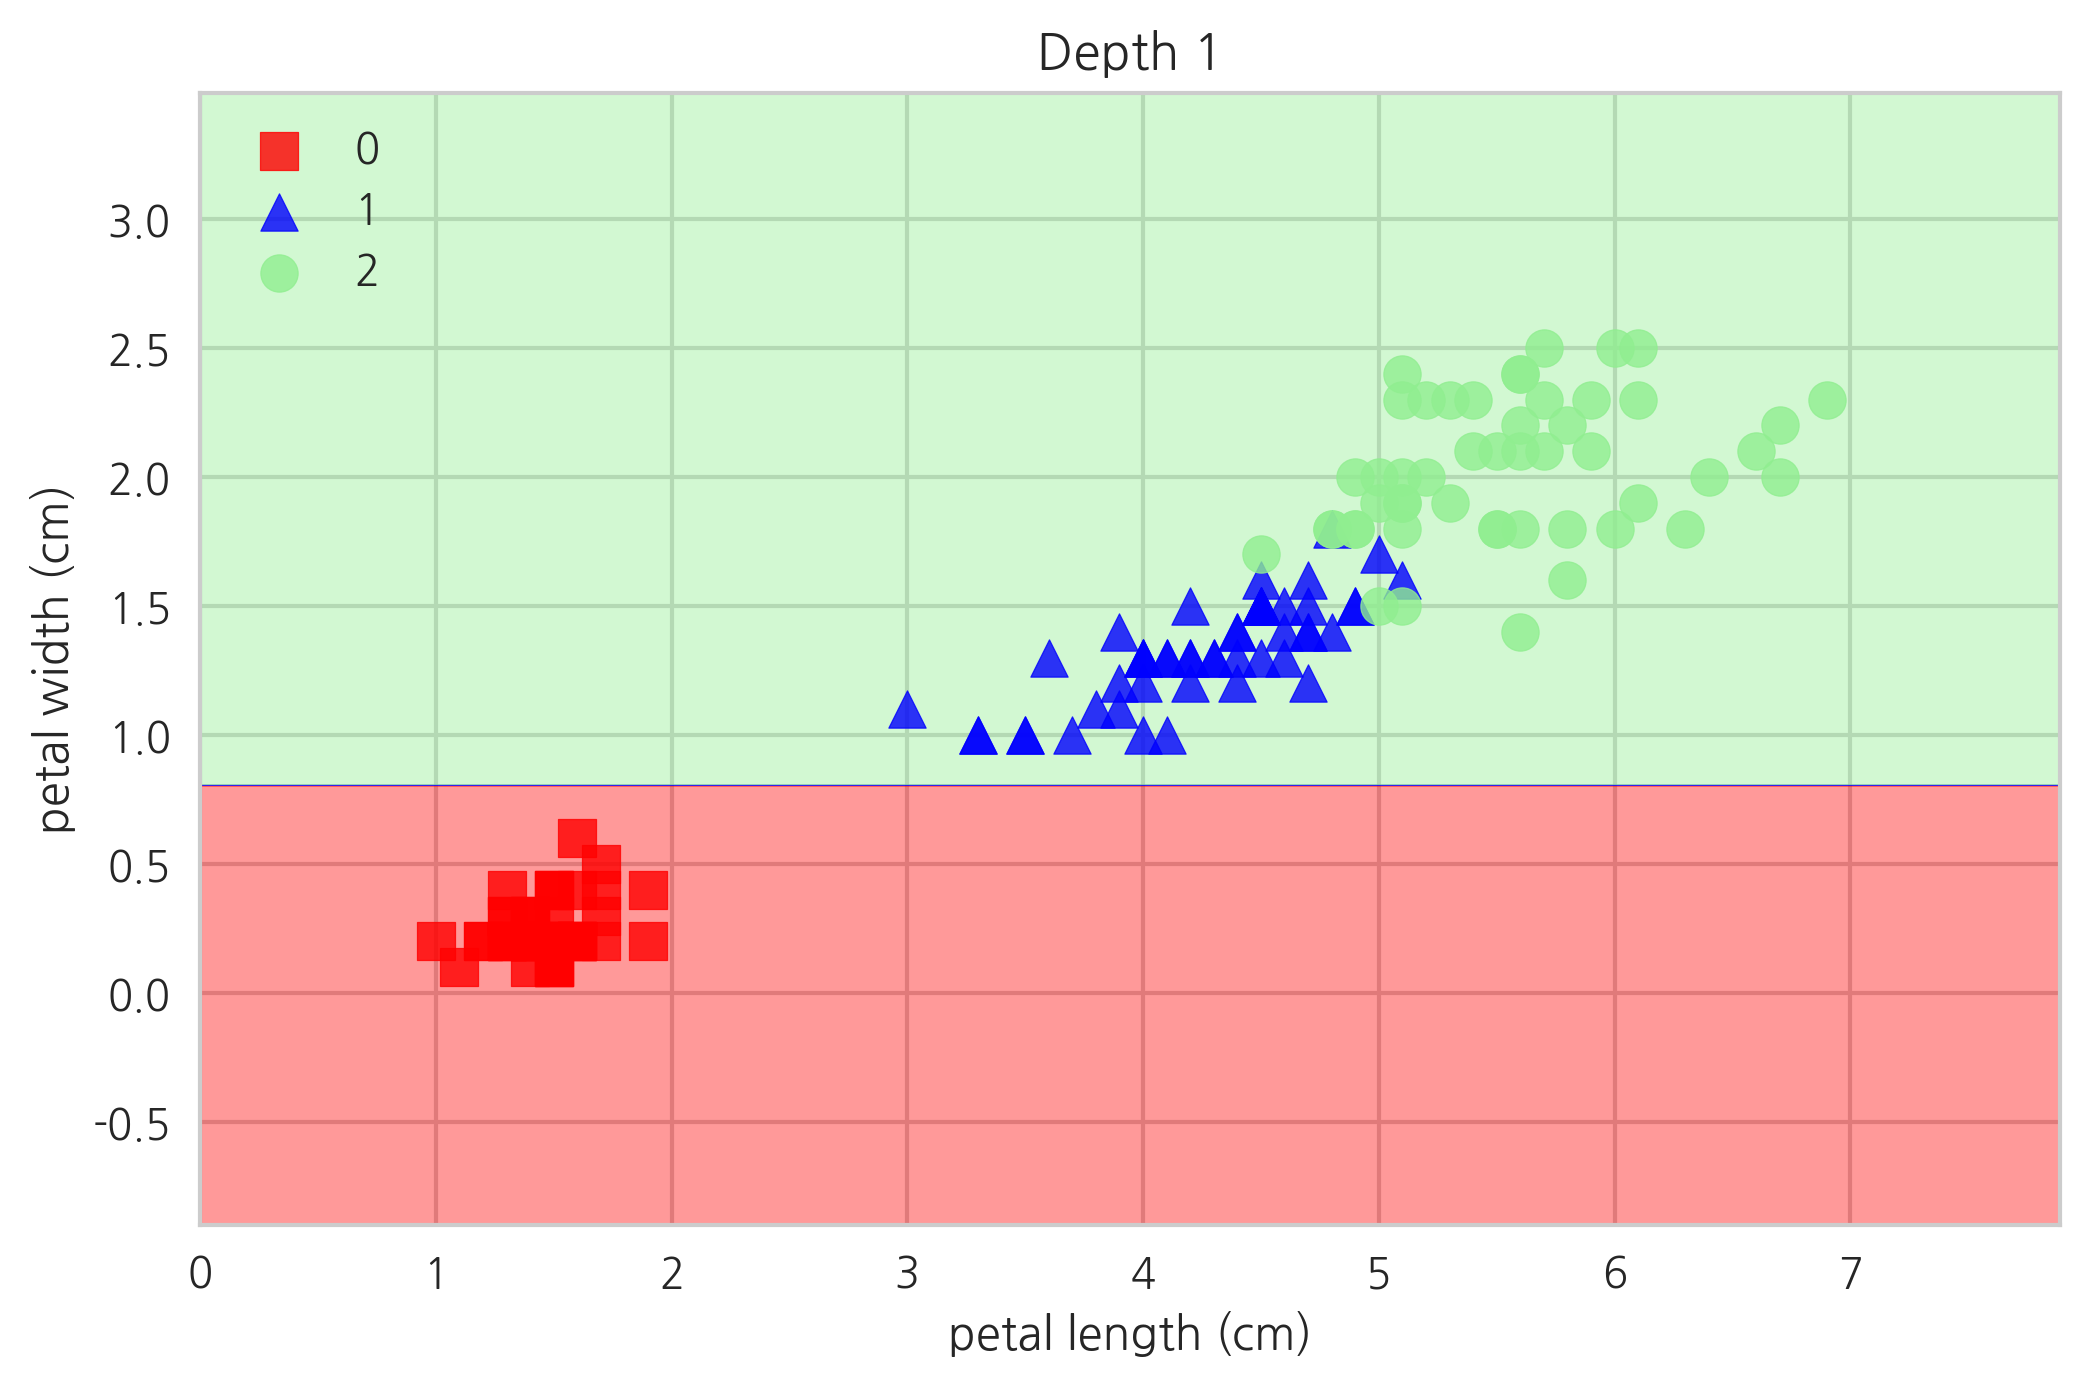

In [5]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [7]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)

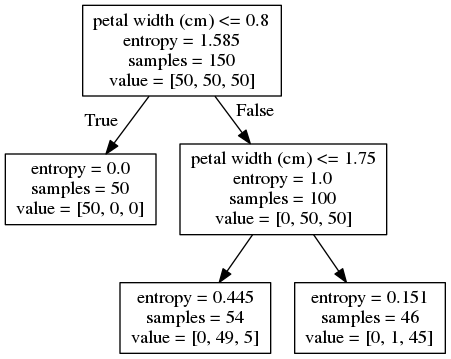

In [8]:
draw_decision_tree(tree2)

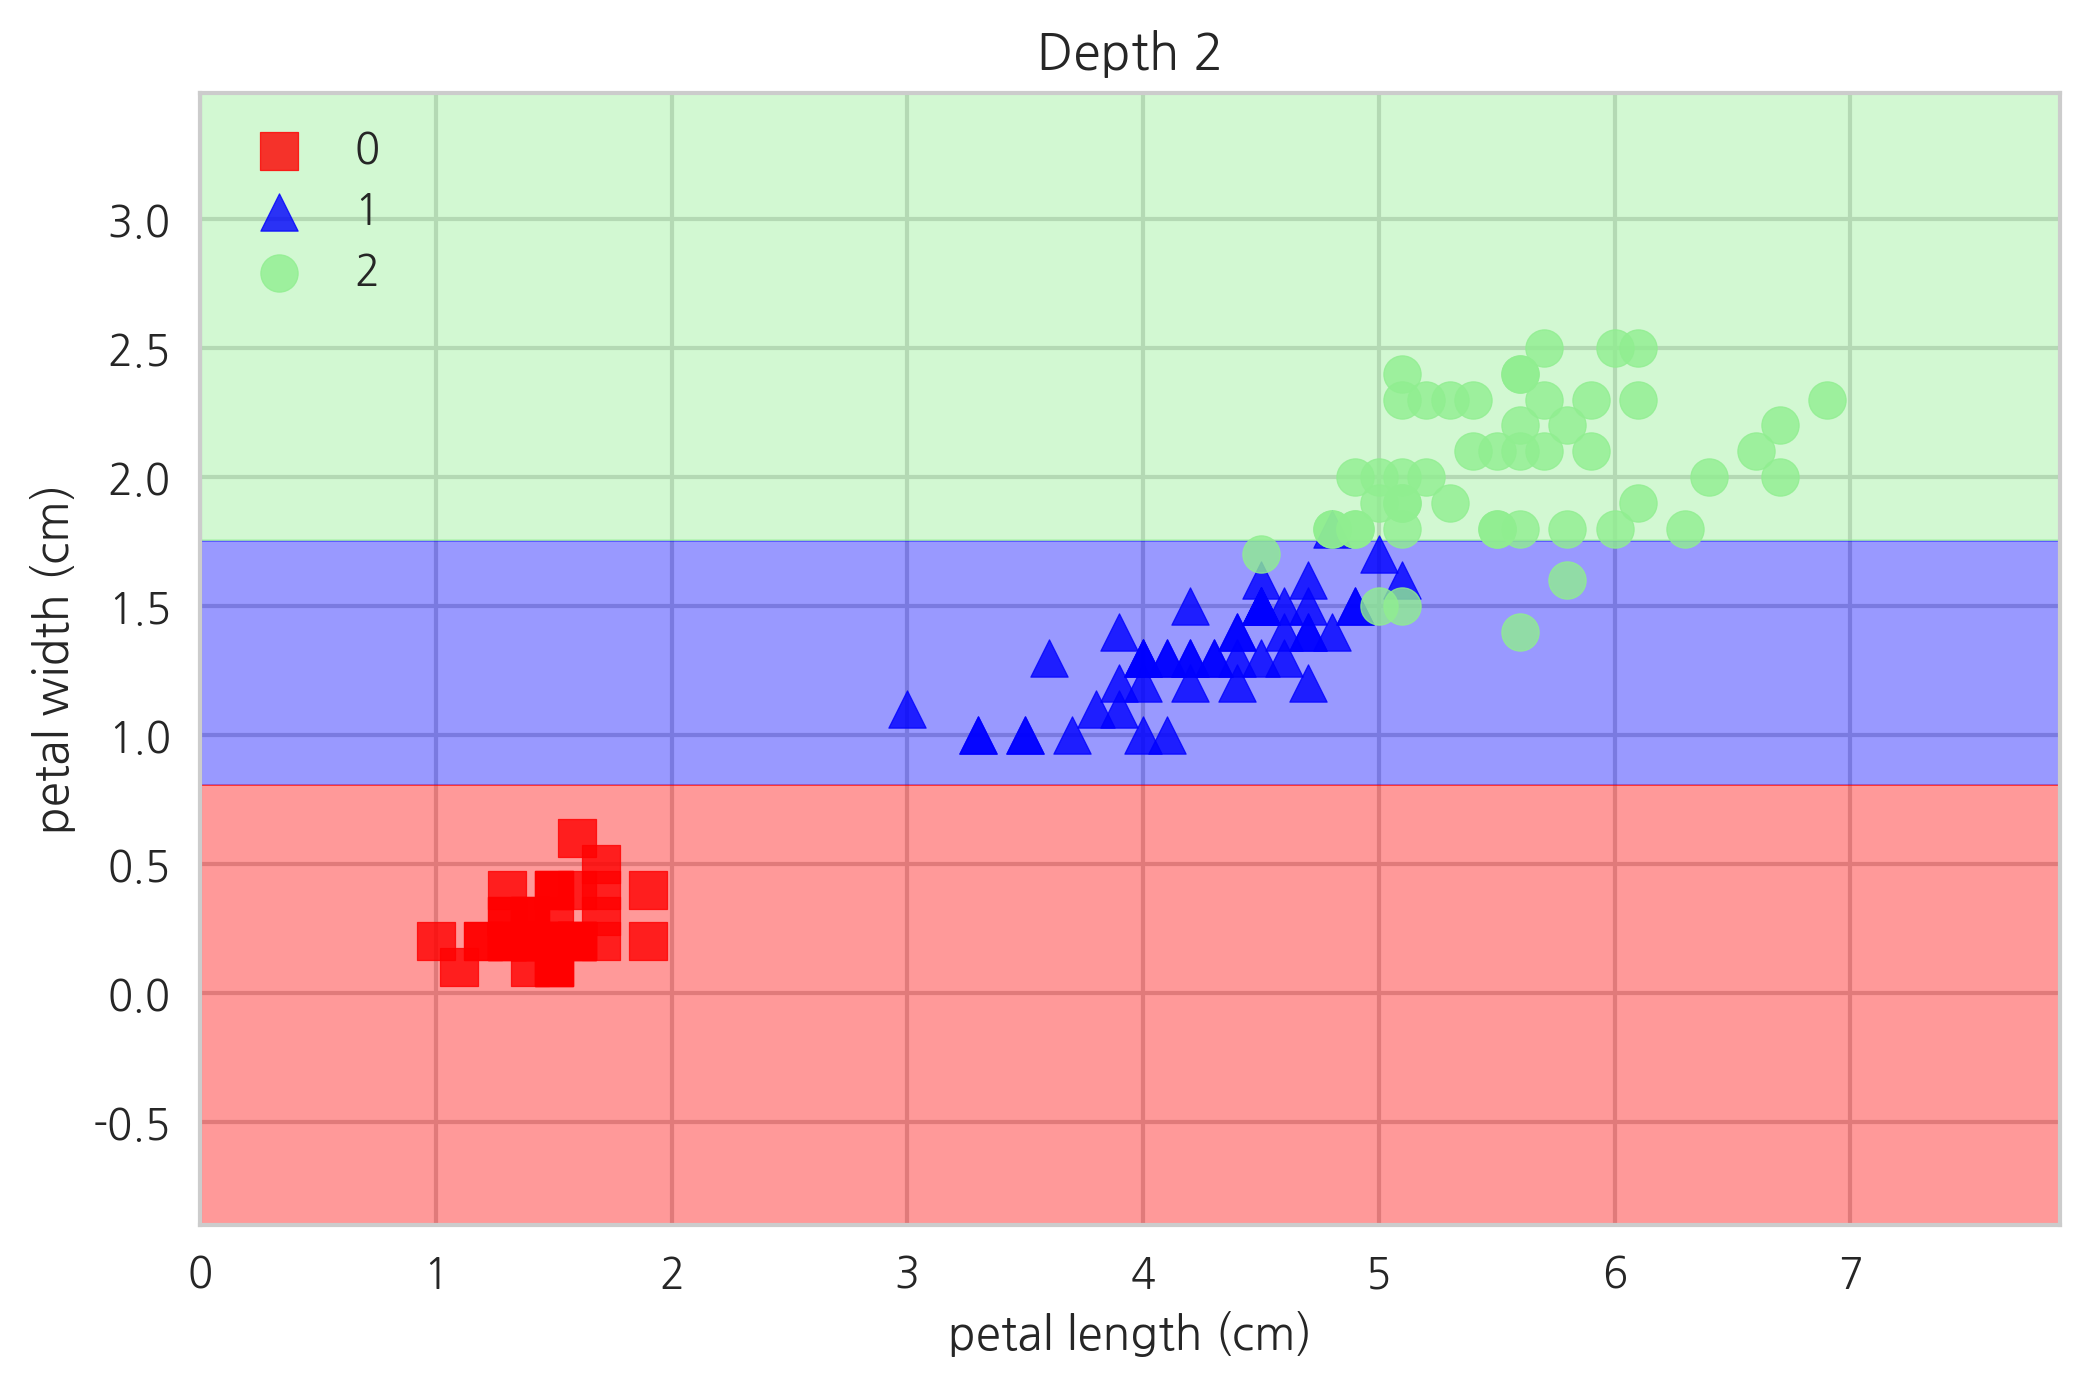

In [9]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [10]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [11]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X, y)

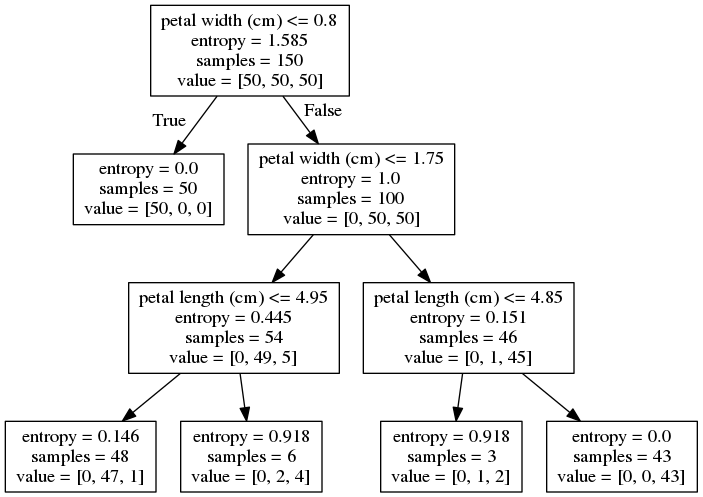

In [12]:
draw_decision_tree(tree3)

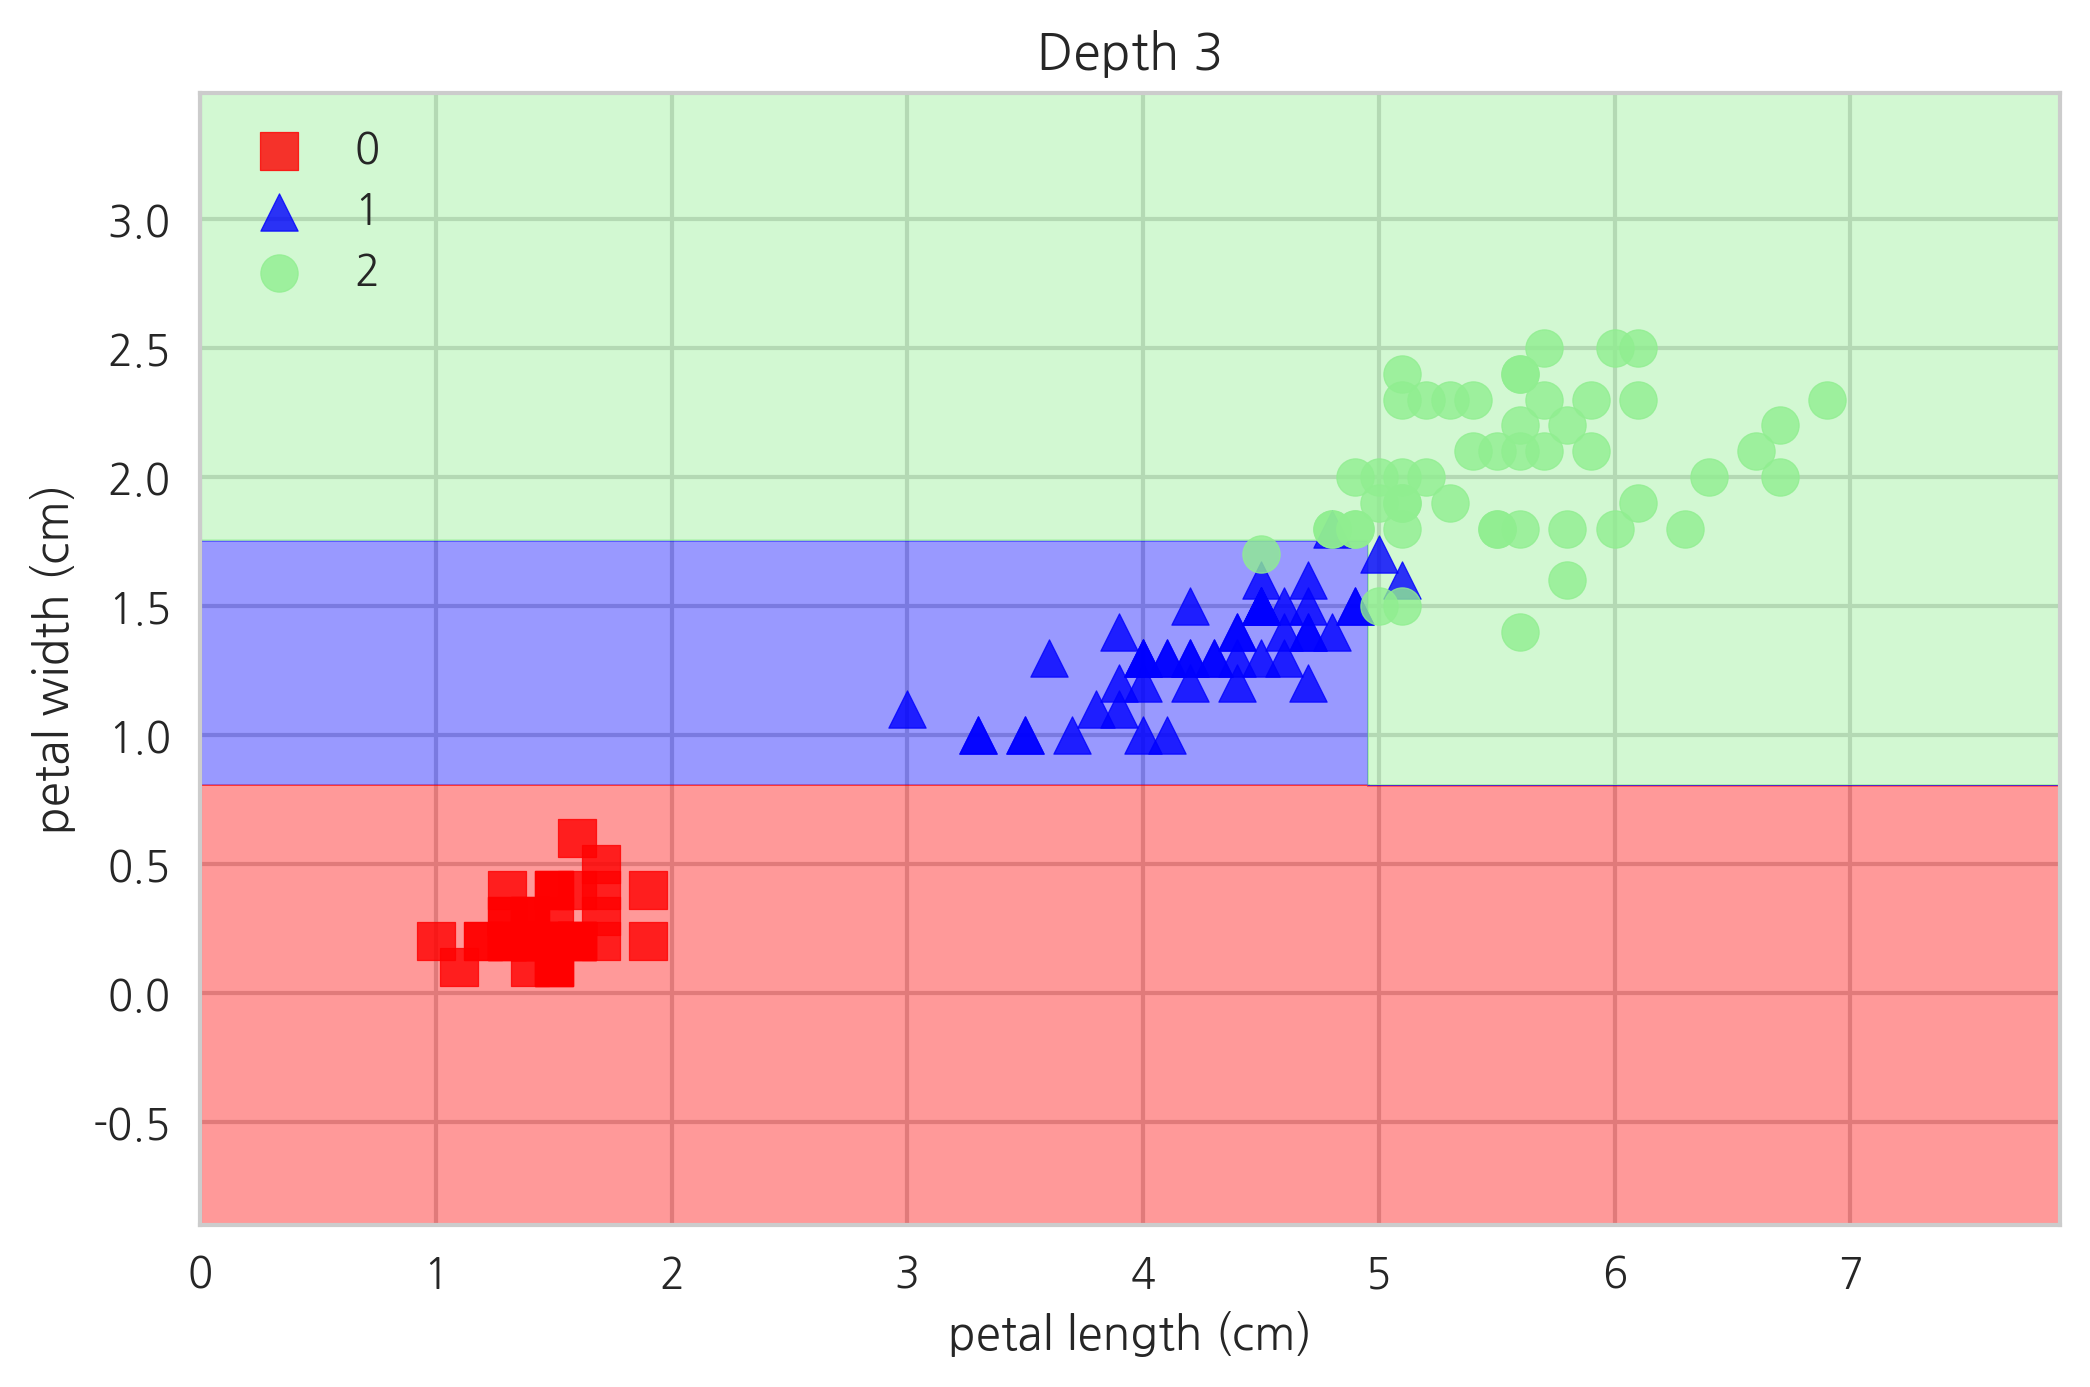

In [13]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [14]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [15]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(X, y)

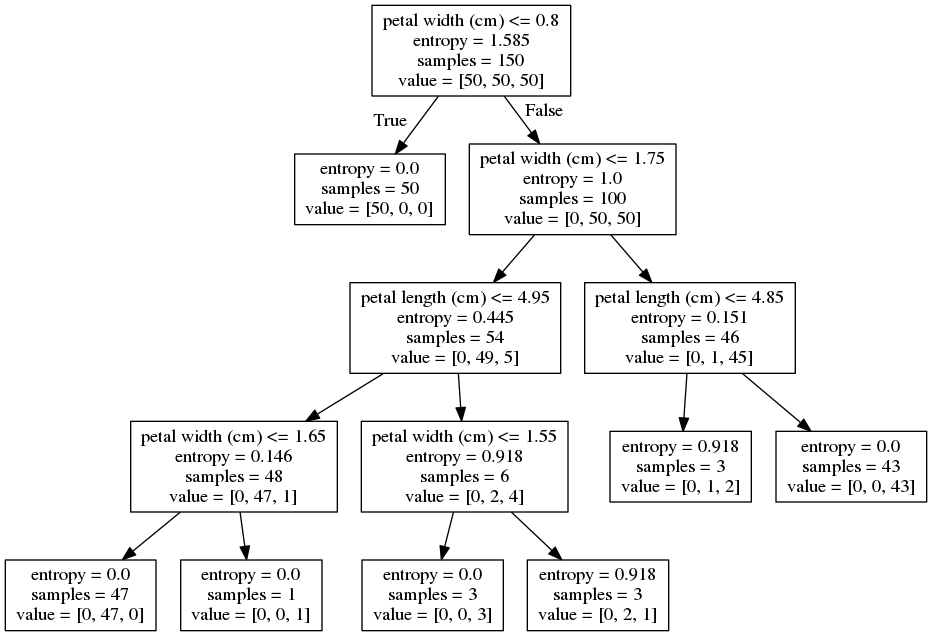

In [16]:
draw_decision_tree(tree4)

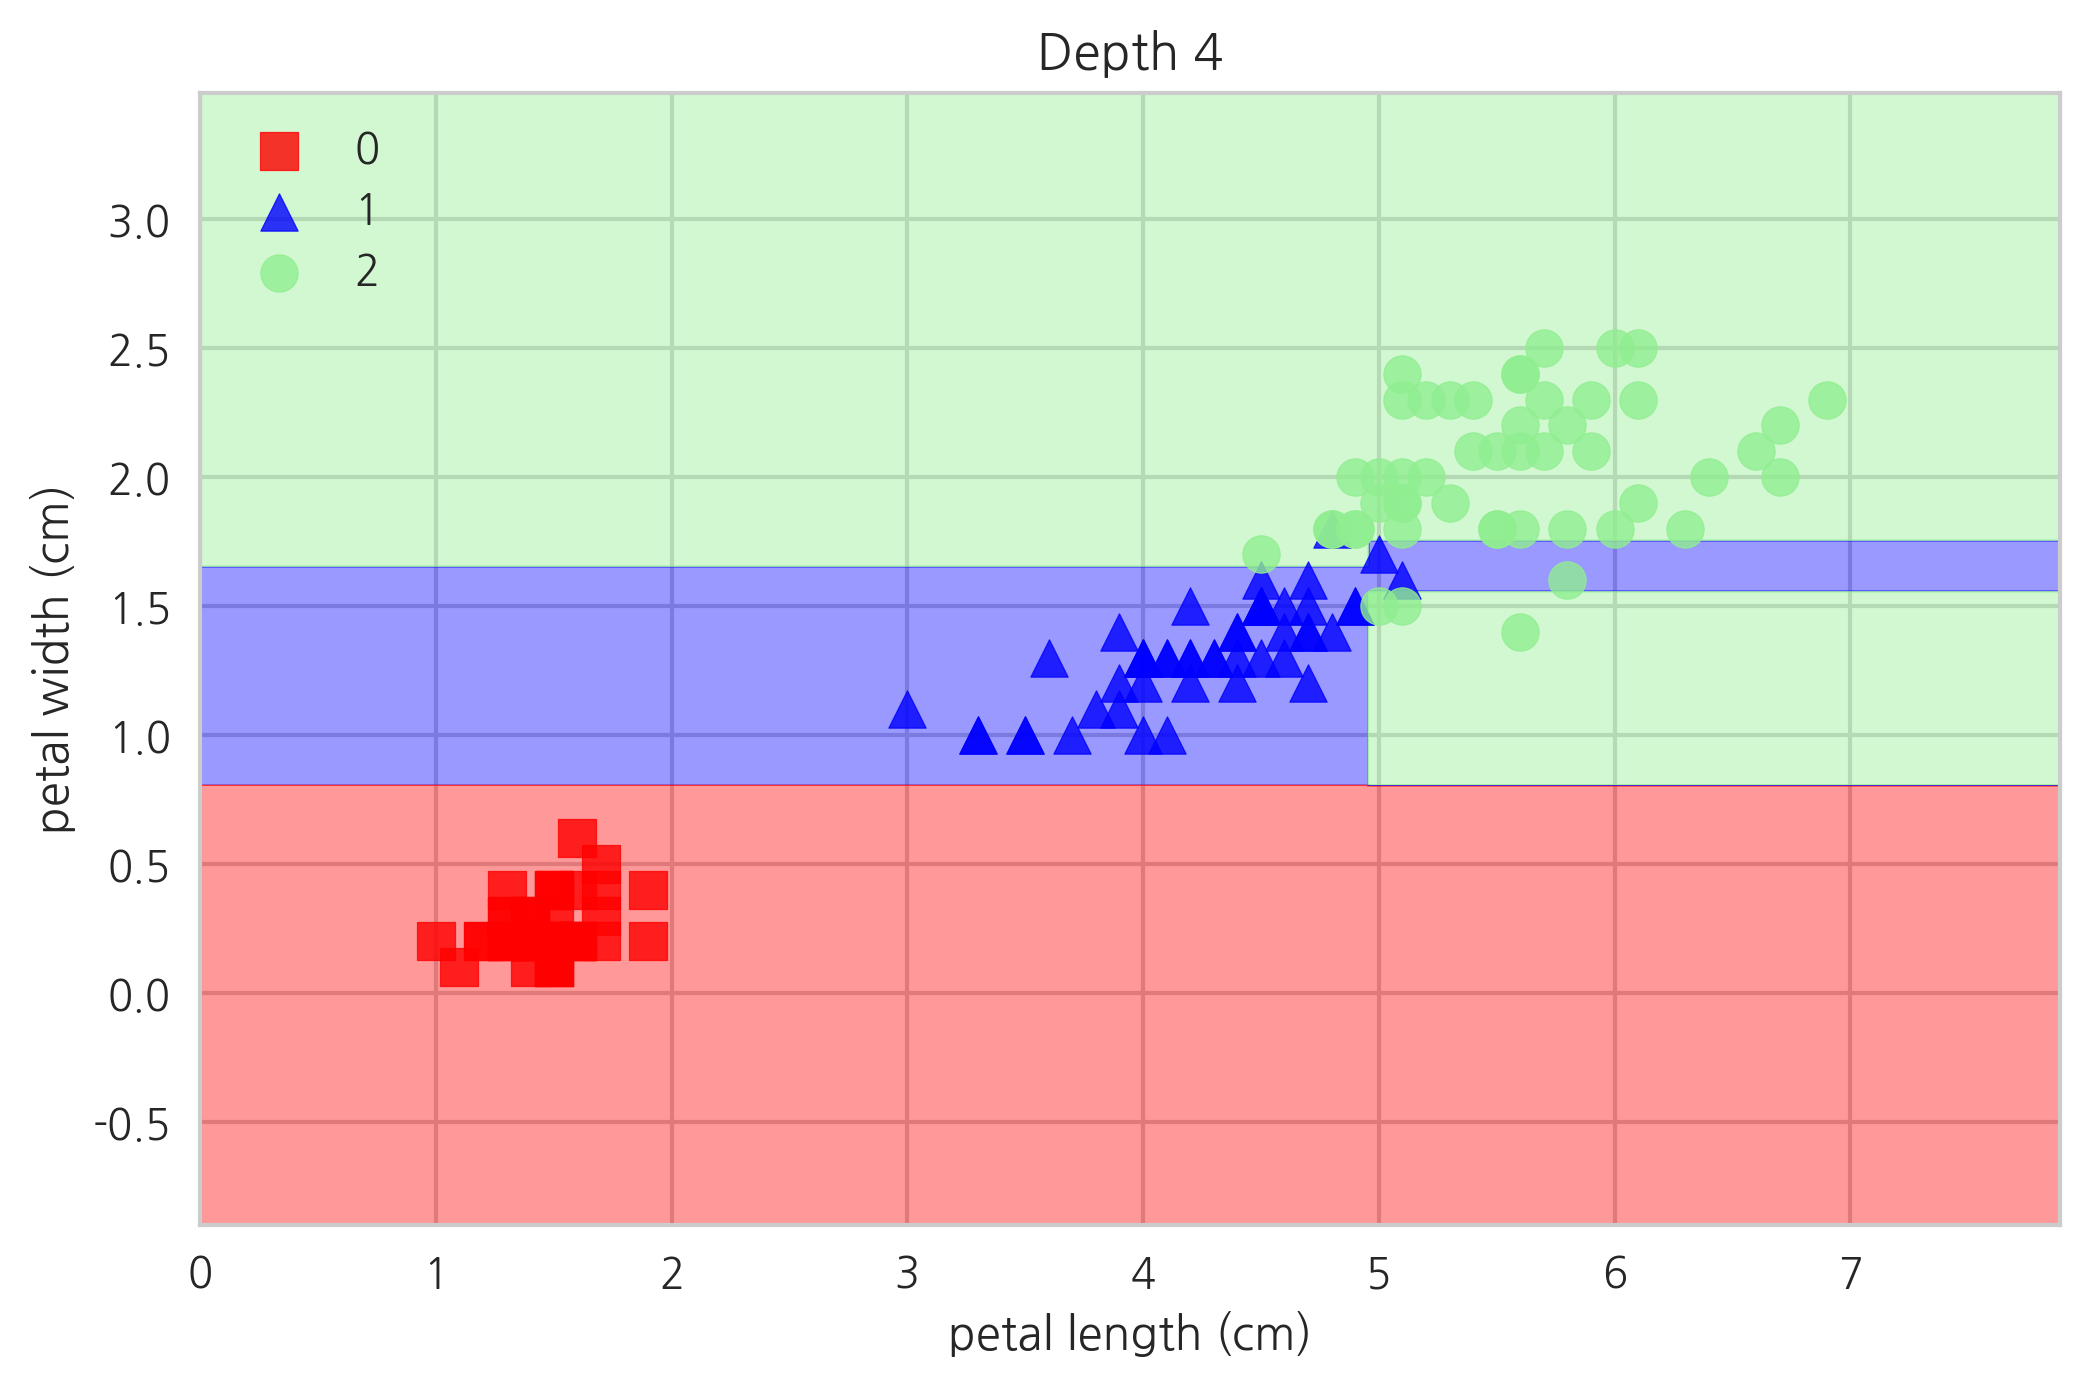

In [17]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [18]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [19]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X, y)

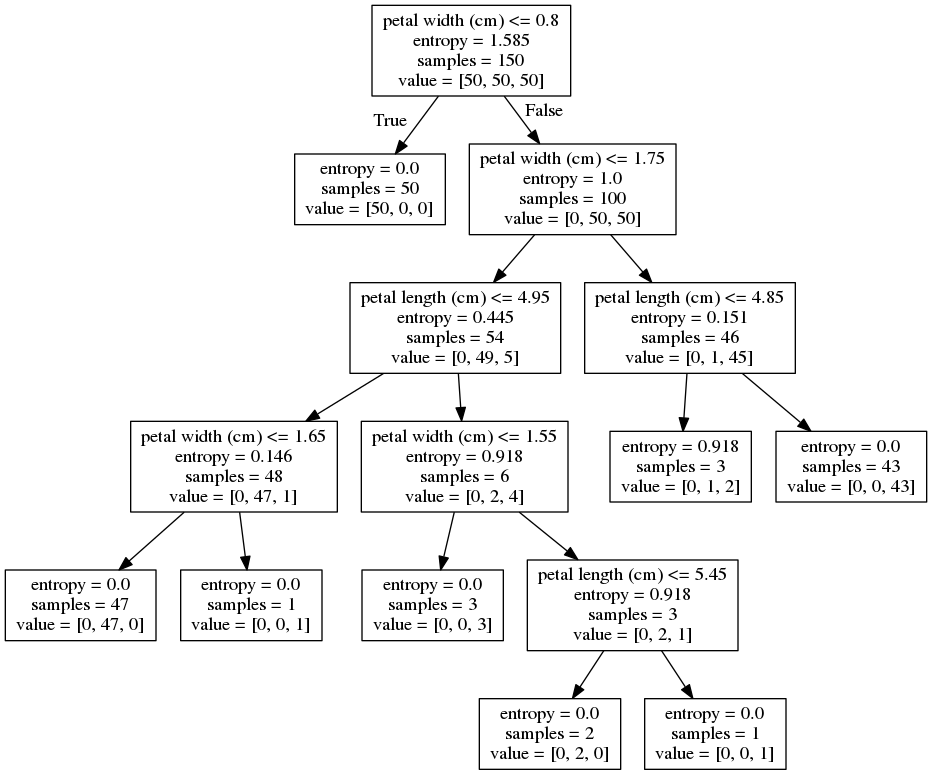

In [20]:
draw_decision_tree(tree5)

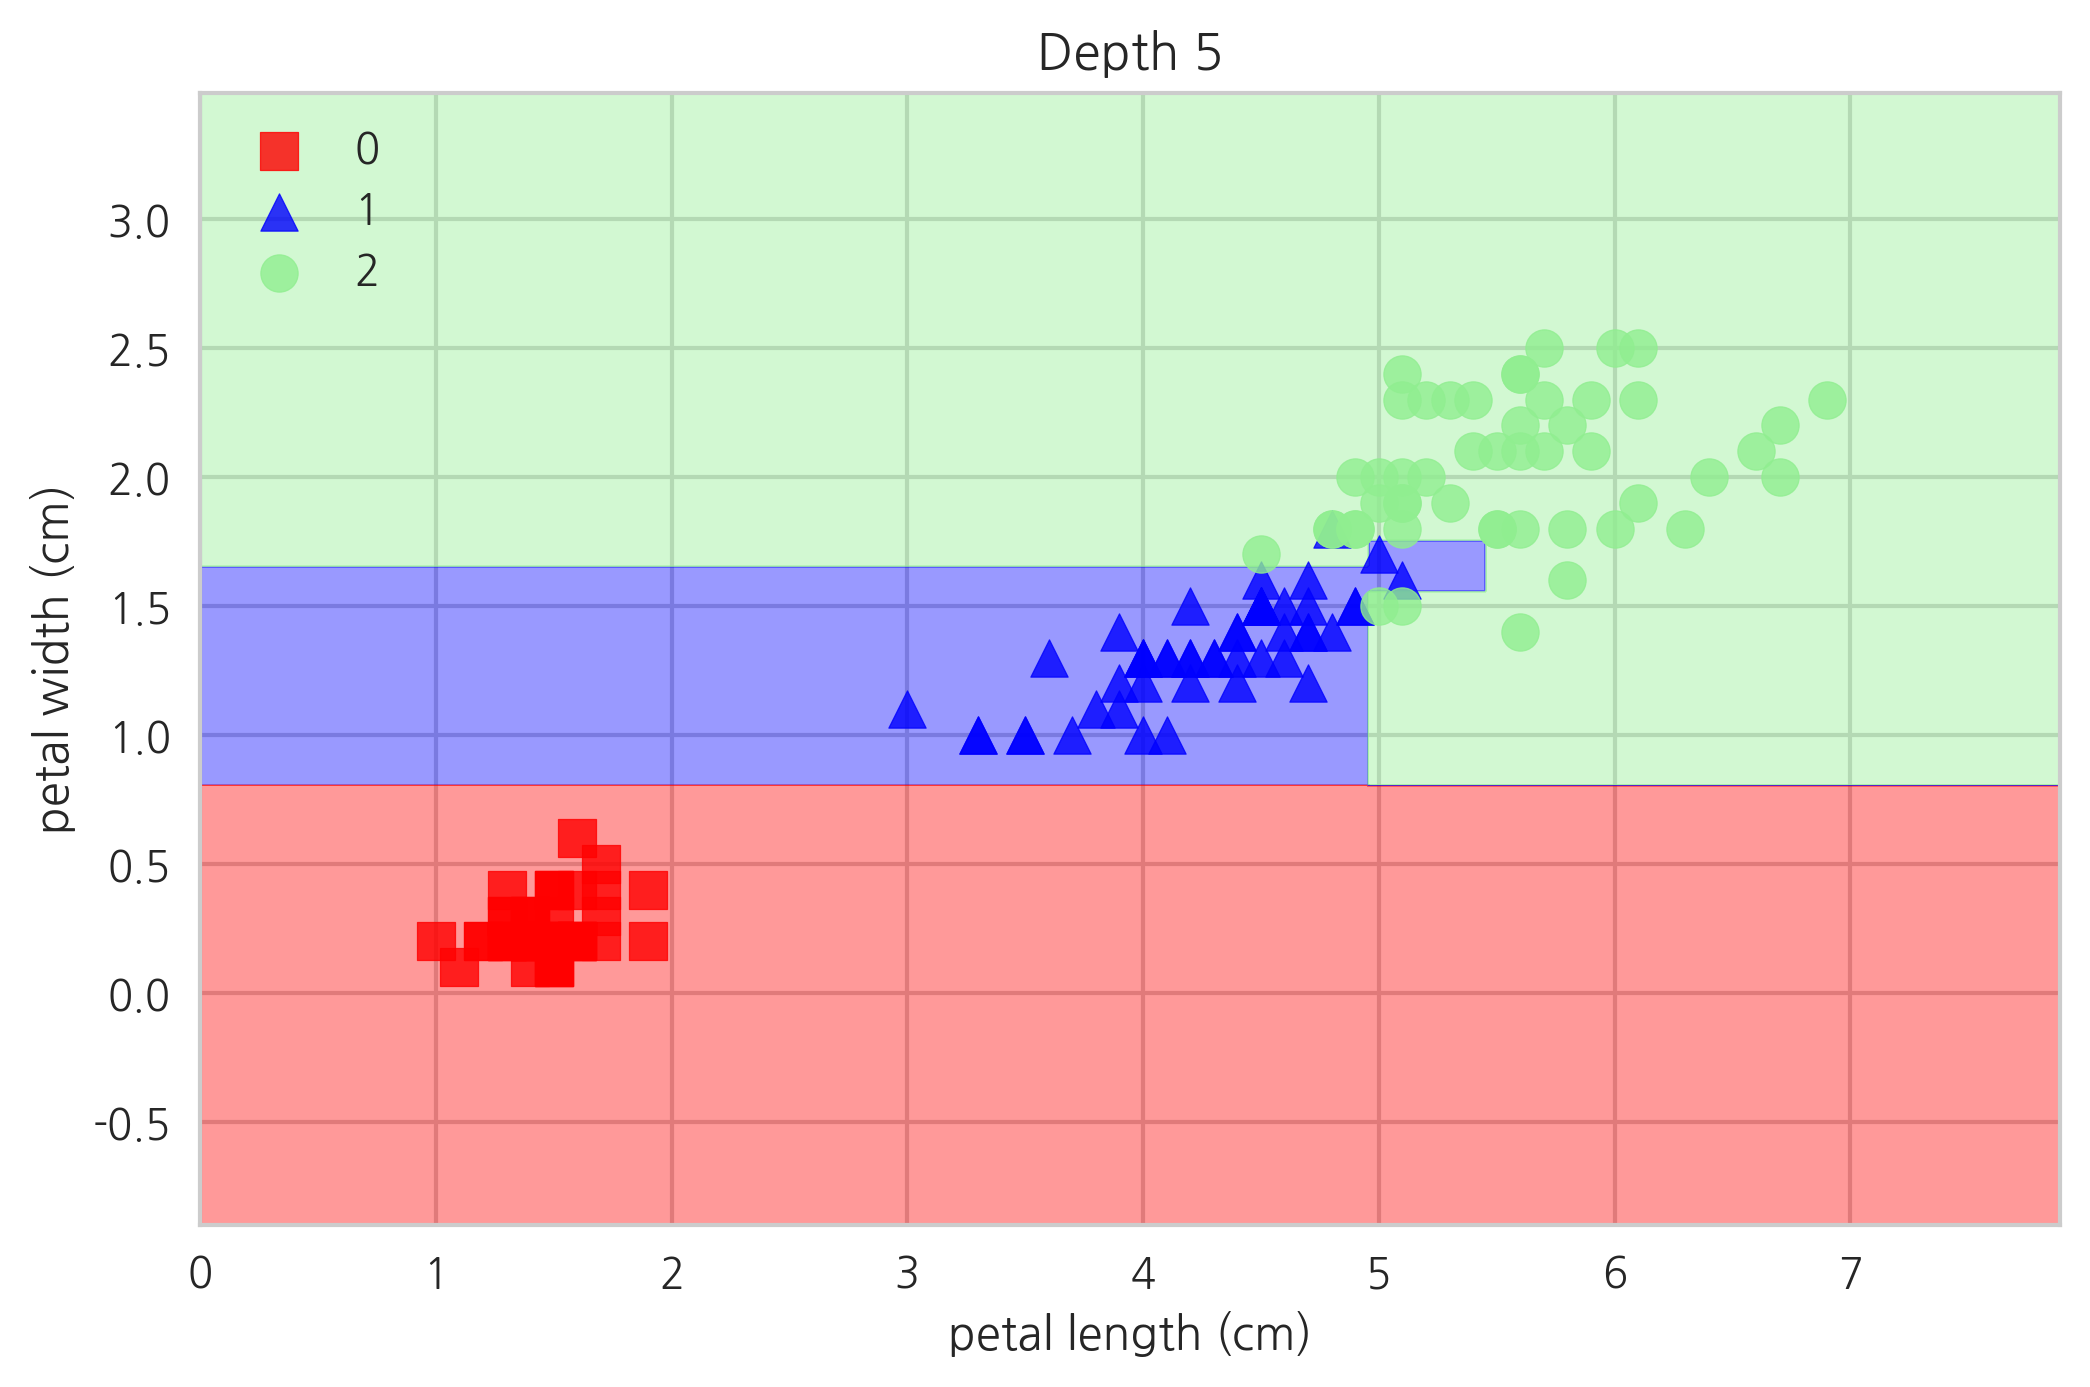

In [21]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [22]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

2개의 독립 변수를 선택하는 여러가지 방법에 대해 성능을 비교하면 다음과 같다.

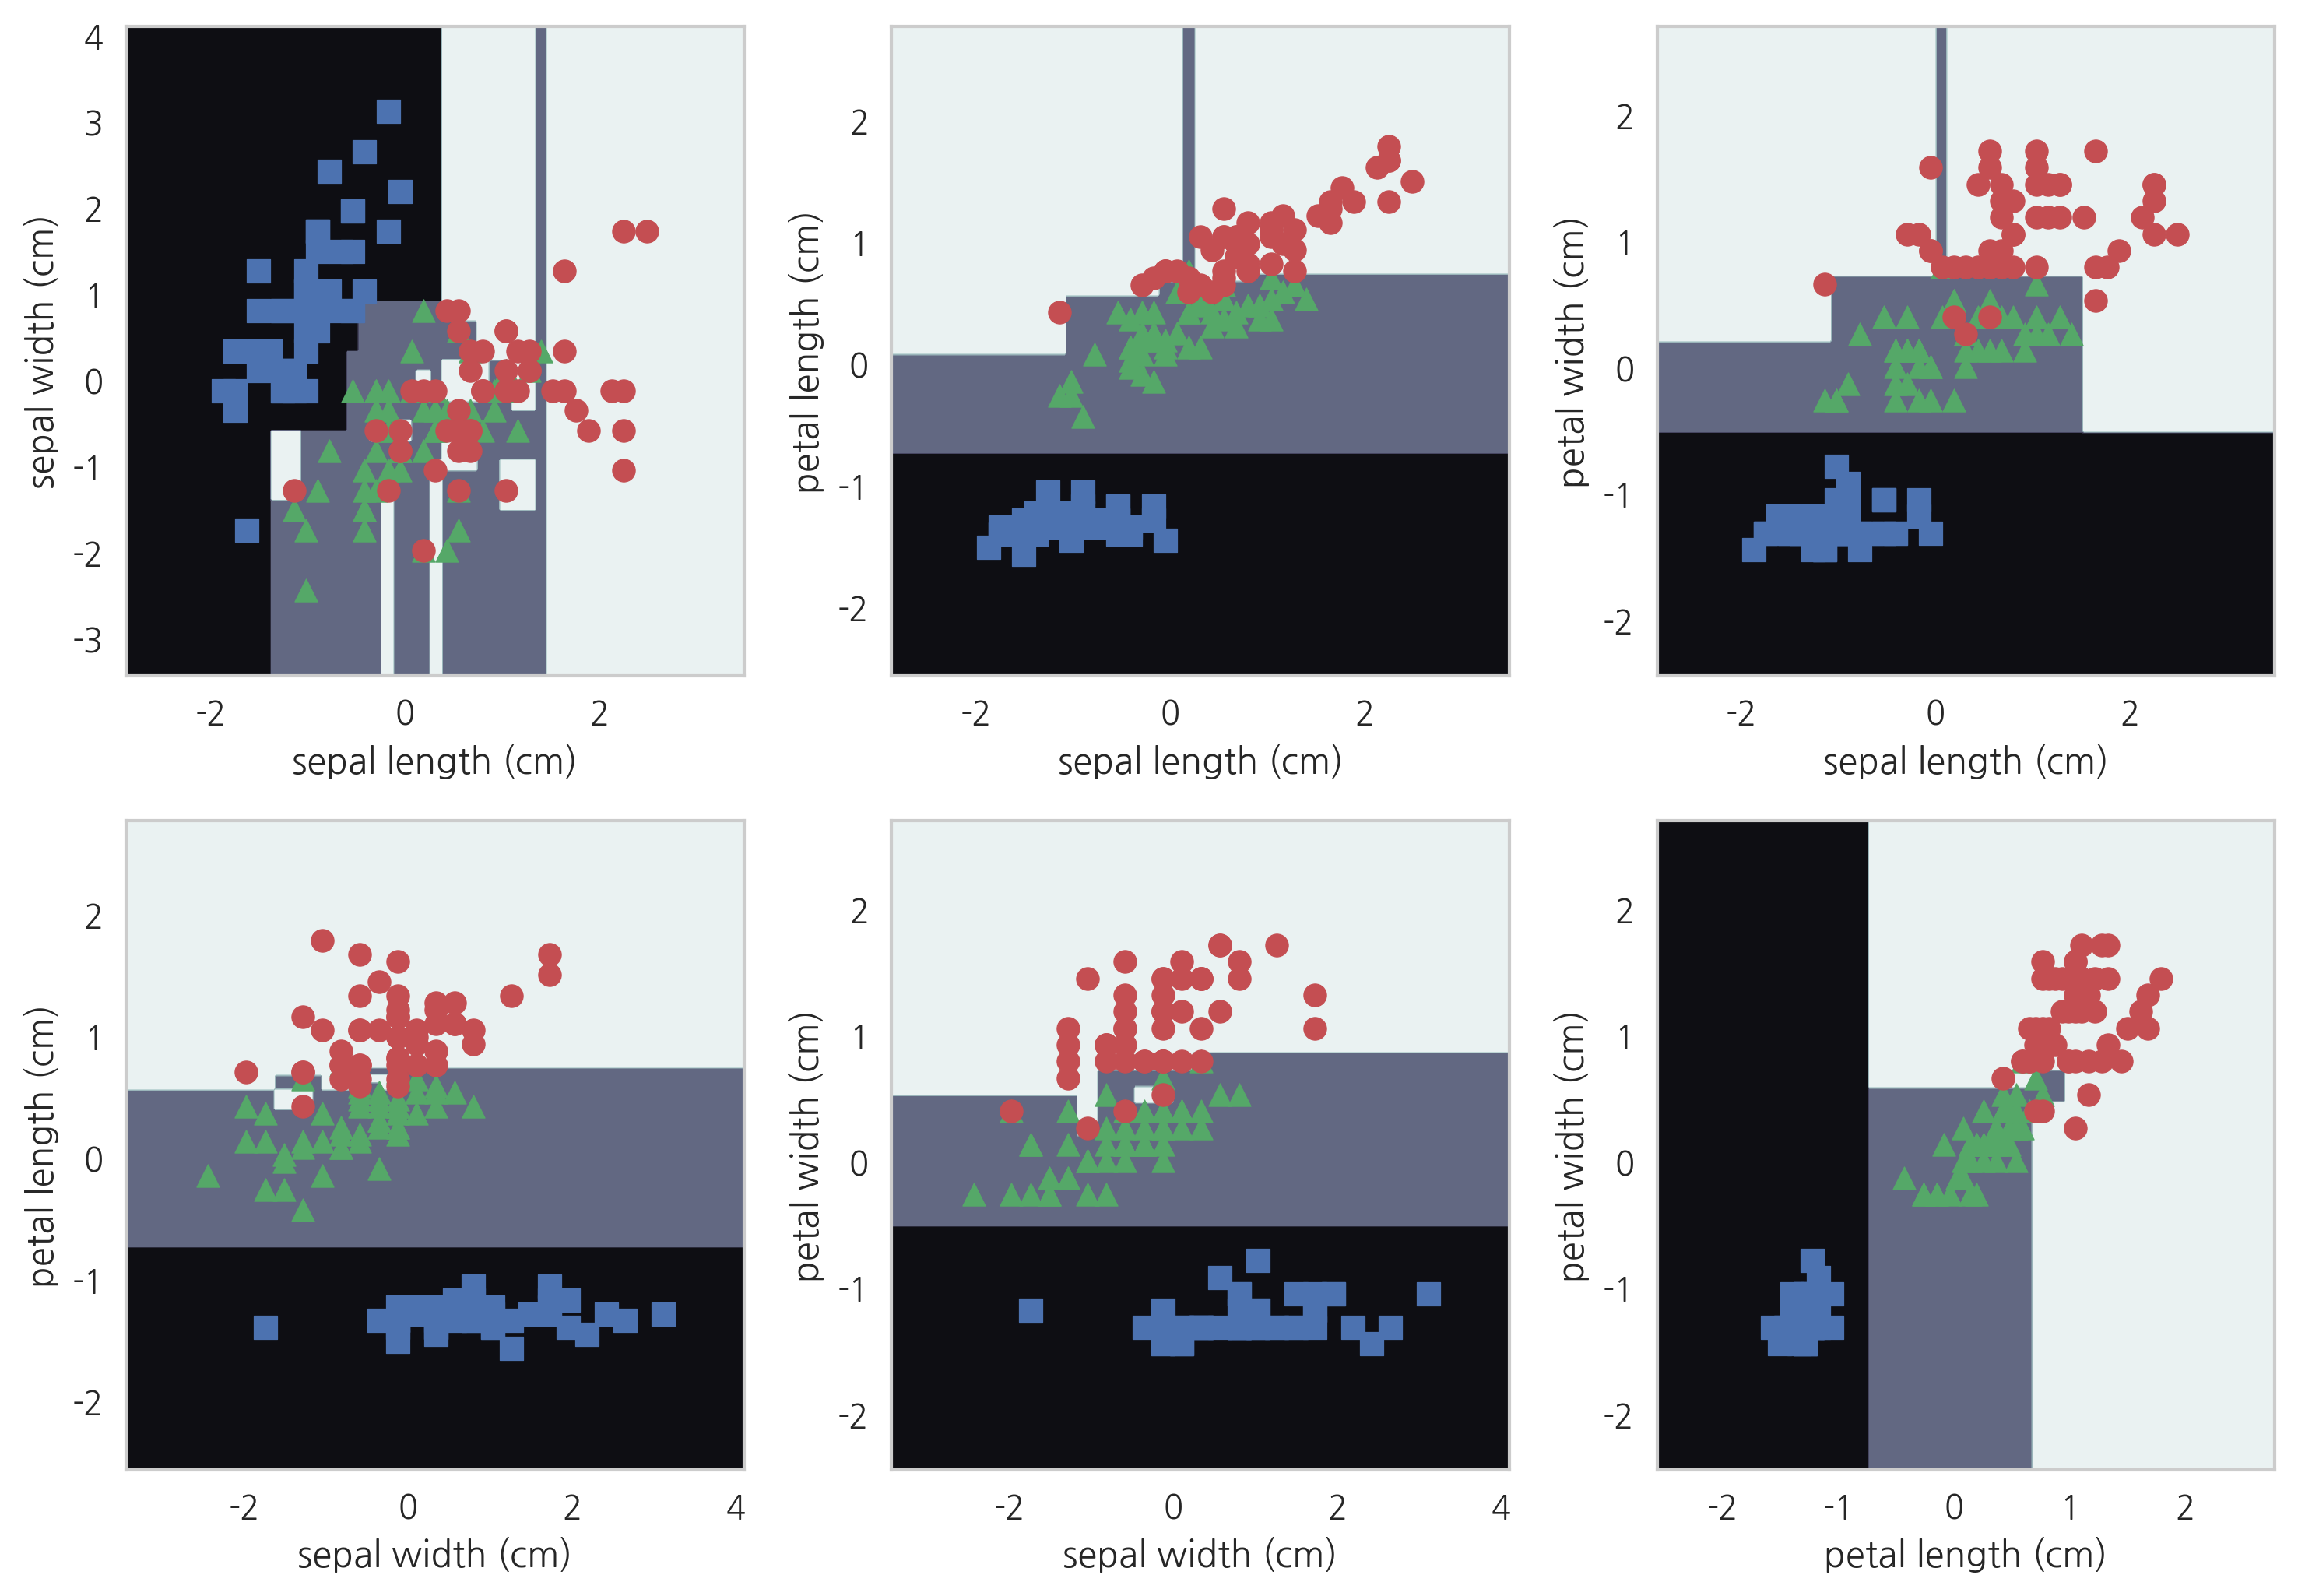

In [23]:
n_classes = 3 
markers = ('s', '^', 'o')
plot_step = 0.02

plt.figure(figsize=(10,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],  [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.bone)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    for i, marker in zip(range(n_classes), markers):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], marker=marker, label=iris.target_names[i])
    plt.axis("tight")

plt.tight_layout()
plt.show() ## 너무 많이 노드를 만들면 결국 오버피팅됨 
### 오버피팅이 된경우에는 cross_validation을 하여 오버피팅 확인 

## 타이타닉호 생존자 예측

In [24]:
titanic = sm.datasets.get_rdataset("Titanic", package="datasets")
df = titanic.data
df.tail()

,Name,PClass,Age,Sex,Survived,SexCode
1308,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0,0
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [25]:
feature_names = ["PClass", "Age", "Sex"]
dfX = df[feature_names].copy()
dfy = df["Survived"].copy()
dfX.tail()

,PClass,Age,Sex
1308,3rd,27.0,male
1309,3rd,26.0,male
1310,3rd,22.0,male
1311,3rd,24.0,male
1312,3rd,29.0,male


In [26]:
from sklearn.preprocessing import LabelEncoder
dfX["Sex"] = LabelEncoder().fit_transform(dfX["Sex"])
dfX.tail()

,PClass,Age,Sex
1308,3rd,27.0,1
1309,3rd,26.0,1
1310,3rd,22.0,1
1311,3rd,24.0,1
1312,3rd,29.0,1


In [27]:
dfX["PClass"].unique()

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [28]:
idx = dfX.PClass.isin(['1st', '2nd', '3rd'])
dfX = dfX[idx]
dfy = dfy[idx]

In [29]:
dfX["Age"].fillna(dfX["Age"].mean(), inplace=True)
dfX.tail()

,PClass,Age,Sex
1308,3rd,27.0,1
1309,3rd,26.0,1
1310,3rd,22.0,1
1311,3rd,24.0,1
1312,3rd,29.0,1


In [30]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["PClass"]), 
                    columns=['1st', '2nd', '3rd'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["PClass"])
dfX.tail()

,Age,Sex,1st,2nd,3rd
1308,27.0,1,0,0,1
1309,26.0,1,0,0,1
1310,22.0,1,0,0,1
1311,24.0,1,0,0,1
1312,29.0,1,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

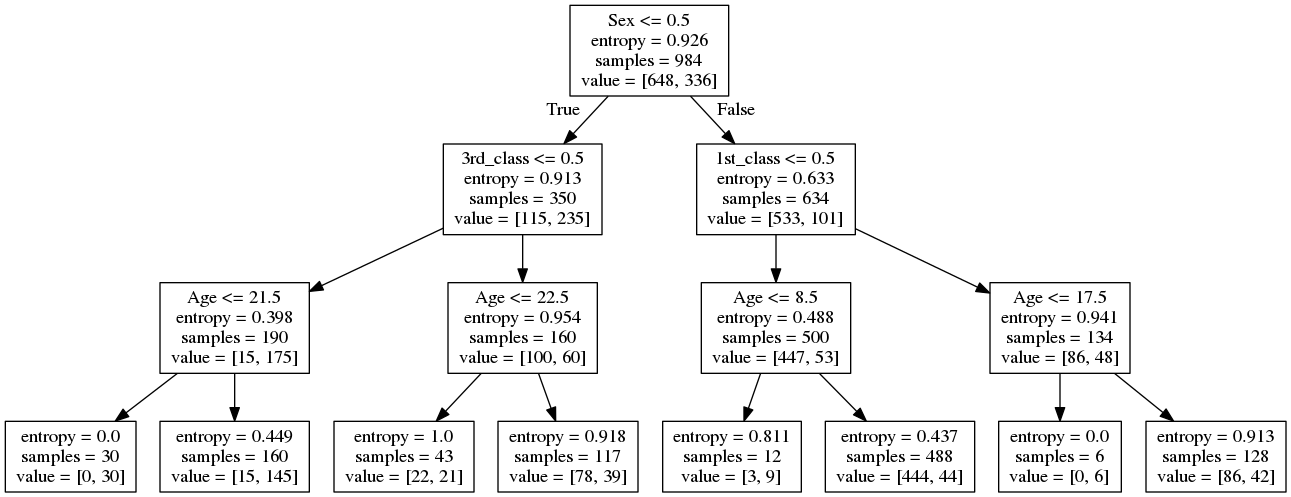

In [33]:
command_buf = io.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['Age','Sex','1st_class','2nd_class','3rd_class']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [34]:
confusion_matrix(y_train, model.predict(X_train))

array([[630,  18],
       [146, 190]])

In [35]:
confusion_matrix(y_test, model.predict(X_test))

array([[205,   9],
       [ 54,  60]])

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.81      0.97      0.88       648
          1       0.91      0.57      0.70       336

avg / total       0.85      0.83      0.82       984



In [37]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.79      0.96      0.87       214
          1       0.87      0.53      0.66       114

avg / total       0.82      0.81      0.79       328

